<Figure size 792x792 with 0 Axes>

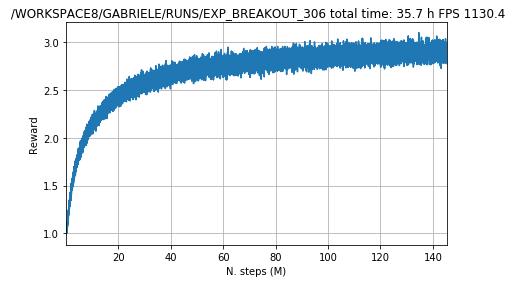

In [2]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd


num_good_traj = 0
my_dir = '/workspace8/gabriele/RUNS/deep_mimic_1'
exps = glob(my_dir+'*')
d = exps[0]
df = load_results(d)




df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['r']
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold




my_dir = '/workspace8/gabriele/RUNS/exp_breakout_306'
exps = glob(my_dir+'*')
d = exps[0]
df_ = load_results(d)



fig = plt.figure(clear=True, figsize=(11,11))

df3 = pd.DataFrame() 

df_['f']= df_['l'].cumsum()/1000000


df_['perf']= df_['r']
df_['perf'].where(df_['perf']>0,0,inplace=True)
df_['goal'] = df_['perf']>0.9  #guess a threadshold



time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))


roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format(d.upper(),total_time/3600, total_steps/total_time))
df[['f','r']].rolling(roll).mean().iloc[0:-1:40].plot('f','r',  ax=ax,legend=False)
#df_[['f','rr']].rolling(roll).mean().iloc[0:-1:40].plot('f','rr',  ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, xlim_))
ax.grid(True)

# ax = plt.subplot(2, 2, 2)
# df[['f','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','min_value', ax=ax,legend=False)
# df[['f','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','max_value', ax=ax,legend=False)
# df[['f','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','mean_value', ax=ax,legend=False)
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('Min Value')
# #plt.xlim((0, xlim_))
# ax.grid(True)

# ax = plt.subplot(2, 2, 3)
# df2[['f_real','reward_woD']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','reward_woD', ax=ax,legend=False)
# df3[['f_real','reward_woD']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','reward_woD', ax=ax,legend=False)
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('Performance without Deomnstrations')
# #plt.xlim((0, xlim_))
# ax.grid(True)

# ax = plt.subplot(2, 2, 4)
# df[['l']].rolling(roll).mean().iloc[0:-1:40].plot(y='l', ax=ax,legend=False)
# ax.set_xlabel('N. episodes')
# ax.set_ylabel('Episode lenght')
# #plt.xlim((0, xlim_))
# ax.grid(True)